# Some more fun things to do

Below are a couple of other astronomy-based activities at which you can try your hand, which are more open-ended and self-directed. A lot of it uses the file (in this folder) `some_pulsars.txt` (advice on reading text files is given in the notebook [Loops_ifs_files](Loops_ifs_files.ipynb)). Make yourself new Notebooks for addressing these problems!

_Hint_ You can find much of the necessary `astropy` functionality in the notebook [getting_stuff_done](getting_stuff_done.ipynb)

## Time is of the essence!

Write some code to take the pulsars in the  and convert the `ra` and `dec` from `hhmmss` and `ddmmss` into decimal degrees. Start with just a few, say 5 (but don't take them from the first 10, a bunch of them are in a Globular cluster and very close together!). Write some code to find the separations between them. As the distance from puslar 1 to pulsar 2 is the same as the distance from pulsar 2 to pulsar 1, make sure you don't have duplication in your dataset.

### Efficient observing

The most efficient way to observe them, assuming all are equally important and all stay up through the observation (and a bunch of other things; writing optimal observing scripts is _hard_), is to observe in the order which minimises slew time. Write some code, for your pulsars, to minimise that slew time; just assume that the angular separation is the proxy for the slew time (ie, you're trying to minimise the total traversed angular distance over the observing run).

### The salesman must travel!

This problem will get computationally slow. Have a look at how hard it gets. Using the Python `time` module, see how the run time scales with number of pulsars, (there will be a limit to what is tractable! It gets demanding very fast). _Bonus_: Plot the results with `matplotlib`

_Note_ Although this can be done badly or well, the underlying problem is computationally hard however you do it, and won't scale well! Indeed, it's the Travelling Salesman Problem, a classic NP-complete problem. There are some Python implementations for the Travelling Salesman Problem you can search up online. In big problems, it'd be easier to sacrifice some efficiency for computational tractability. _Hard_: How might you do that? Some ideas may be [here](https://en.wikipedia.org/wiki/Travelling_salesman_problem#Heuristic_and_approximation_algorithms).

## Plotting

Many of you will have seen the Aitoff projections of pulsar positions; try plotting some/many of the pulsar positions in `some_pulsars.txt`. The examples in the `astropy` documentation [here](http://docs.astropy.org/en/stable/coordinates/skycoord.html#example-1-plotting-random-data-in-aitoff-projection) or [here](http://docs.astropy.org/en/stable/coordinates/skycoord.html#example-2-plotting-star-positions-in-bulge-and-disk) will help.

Looking at the `matplotlib` documentation, can you think of ways to indicate pulsar details (period and/or dm) on the plot? What if pulsars are very close together (as with the GC pulsars with names beginning `J0024-7204`)

In [70]:
from astropy import units as u
from astropy.coordinates import *
import astropy as ap
import numpy as np

In [55]:
##### skycoords=[]
with open('some_pulsars.txt',mode='r') as pulsarfiles:
    for line in pulsarfiles:
        if '#' in line:
            continue
        line=(line.strip()).split('\t')
        if len(line) != 5:
            continue
        ra = line[1]
        dec = line[2]
        ra = ra.split(':')
        if len(ra) == 3:
            ra = ra[0]+'h'+ra[1]+'m'+ra[2]+'s'
        elif len(ra)==2:
            ra = ra[0]+'h'+ra[1]+'m'
        else:
            continue
        dec = dec.split(':')
        if len(dec) == 3:
            dec = dec[0]+'d'+dec[1]+'m'+dec[2]+'s'
        elif len(dec) == 2:
            dec = dec[0]+'d'+dec[1]+'m'
        else:
            continue
        skycoords.append(SkyCoord(ra,dec,frame='icrs'))

In [56]:
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')

In [57]:
print(len(skycoords))

3603


In [63]:
newcoord = ap.coordinates.concatenate(skycoords)

In [64]:
ra_rad = newcoord.ra.wrap_at(180 * u.deg).radian

In [67]:
dec_rad = newcoord.dec.radian

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


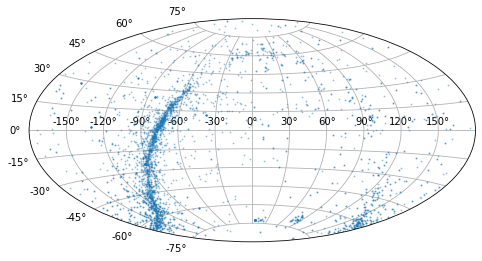

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,4.2))
plt=fig.add_subplot(111, projection="aitoff")
plt.grid(True)
plt.plot(ra_rad, dec_rad, 'o', markersize=1, alpha=0.3)
fig.subplots_adjust(top=0.95,bottom=0.0)
fig.show()
fig.savefig('aitoff.png')

In [81]:
newcoord=newcoord.transform_to('galactic')

In [83]:
print(newcoord)

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, )
    [(108.17213577, -42.98498836, 1.), (116.49715648, -14.63119819, 1.),
     (305.923561  , -44.89219963, 1.), ...,
     ( 33.38015077,  72.10071071, 1.), ( 85.59438512,  47.20951937, 1.),
     ( 28.63695394, -70.22811232, 1.)]>


In [84]:
ra=newcoord.l.wrap_at(180*u.degree).radian
dec=newcoord.b.radian

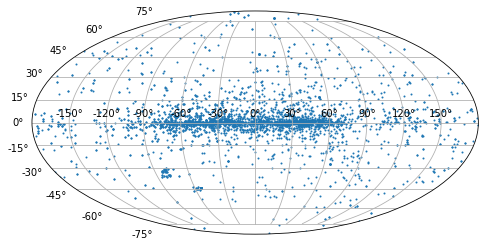

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
fig2 = plt.figure(figsize=(8,6))
ax = fig2.add_subplot(111, projection="mollweide")
ax.scatter(ra, dec,s=1)
ax.grid(True)
fig2.savefig('galacticmap.png')